# Assignment 1: Predicitive Modelling
Samantha is a Lego enthusiast seeking assistance on being able to predict the price of a new Lego product before the price is revealed so they can budget it from their revenue.

To provide this predicition, use of a data set from Kaggle (Kaggle 2018) which scarped data from Lego.com will be ultilised.

In [1]:
# Import the libraries.
# Core Libraries
import pandas as pd # For DataFrame.
import numpy as np # For various numerical functions.
import seaborn as sns # For plotting graphs.
import matplotlib.pyplot as plt # For plotting graphs.

# Preprocessing and Modelling Functions
from sklearn.model_selection import train_test_split # For splitting data into test and train segments.
from sklearn.linear_model import LinearRegression # The chosen model.
from scipy.stats import chisquare # A normalisation checking function.

# For better Jupyter Viewing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Loading the Data
Good practice involves opening any dataset using a raw text editor first to visually inspect the data and note any details prior to loading it into code.

Seeing no inherent issues with the dataset's formating, load the data into a Pandas DataFrame Object and inspect the various aspects of the dataset.

In [2]:
# Load the csv into a DataFrame
df = pd.read_csv("lego.csv")

From the description of the dataset, the metadata is as follows:

- ages: The lowest Age in years the Lego product caters to. Categorical. Integer
- list_price: Price of the Lego product. Numerical. Float. Target
- num_reviews: Number of reviews on the Lego Product. Numerical. Integer.
- piece_count: Number of Lego pieces in product. Numerical. Integer.
- play_star_rating: Average rating by players at Playstar. Numerical. Float.
- review_difficulty: The difficulty level of the product. Categorical. Integer.
- star_rating: Average rating for the product. Numerical. Float.
- theme_name: Theme ID. Categorical. Integer.
- val_star_rating: Another source of averaged rating for the same products. Numerical. Float.
- country: Number of countries the product is sold in. Numerical. Integer.

In [3]:
# Display the various surface details of the data
print("Head of DataFrame \n")
df.head()
print("\nTail of DataFrame \n")
df.tail()
print("\nShape of DataFrame \n")
df.shape
print("\nInfo of DataFrame \n")
df.info()
print("\nNull values present in DataFrame \n")
df.isnull().sum()
print("\nDescription of DataFrame")
df.describe(include = "all")

Head of DataFrame 



,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20



Tail of DataFrame 



,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
12256,23,36.5878,6,341,4.4,2,4.3,38,4.2,19
12257,23,24.3878,8,217,4.1,2,3.6,38,4.1,19
12258,23,24.3878,18,233,4.6,2,4.6,38,4.5,19
12259,20,12.1878,1,48,5.0,4,5.0,38,5.0,19
12260,20,12.1878,11,109,4.5,2,4.7,38,4.8,19



Shape of DataFrame 



(12261, 10)


Info of DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   star_rating        12261 non-null  float64
 7   theme_name         12261 non-null  int64  
 8   val_star_rating    12261 non-null  float64
 9   country            12261 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 958.0 KB

Null values present in DataFrame 



ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
star_rating          0
theme_name           0
val_star_rating      0
country              0
dtype: int64


Description of DataFrame


,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,3.917698,20.523367,3.609844,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,1.603276,11.990176,1.614694,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000


All of the data is expressed as a number, either as an integer or a float. 

This means that categorical data such as themes and review difficulty have already been converted into ordinal categorical data. That said, themes shouldn't be left as ordinal if they are to be inputted into the model, as the themes themselves should not contain an inherent order. The options would be to ignore themes in modelling, or use one-hot encoding instead.

There are no null values in any columns either. This implies that a large amount of the pre-cleaning of the data has already been completed. The original dataset in Kaggle contains none of this pre-cleaning process.

Surface level examination suggests there are no glaring issues with the dataset on loading.

## Target/Dependent variable information
The target is a continuous numerical variable, list_price.

To model a predictor for a continuous numerical variable, a linear or multilinear regression model is ideal. A logistic regression model relies on a binary result, such as a Yes or No, so it shall not be used. When using linear regression models the following 4 core assumptions need to be factored into the process.

1. Homoscedasticity - The size of the error in the prediciton should not change with respect to the independent variable.
2. Independence of observations - Each independent variable used in the model must have a correlation value of less than 0.6 with any other used independent variable.
3. Normality - All used variables have to be normalised.
4. Linearity - The relation between the independent and the dependent variables must be linear in nature.

## Investigate the data

Now that it is loaded, the data will be checked for more details regarding the individual columns.

First is to compare against price, our target value. A corrolation matrix will serve to complete point 2 of the model requirements as well as identify the most correlative variable.

In [4]:
# Isolate the target variable
target = df["list_price"]
# Create Categorical and Numerical column lists
cat_col = ["ages", "theme_name", "review_difficulty"]
num_col = ["list_price", "num_reviews", "piece_count", "play_star_rating", "star_rating", "val_star_rating", "country"]

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
ages,1.000000,-0.077782,-0.160950,-0.092585,0.234272,-0.246311,0.102586,0.481957,0.115955,-0.004427
list_price,-0.077782,1.000000,0.459442,0.869630,0.139085,-0.282117,0.123949,0.189744,0.111213,0.010377
num_reviews,-0.160950,0.459442,1.000000,0.556345,0.147900,-0.194921,0.160247,0.013148,0.171734,-0.000245
piece_count,-0.092585,0.869630,0.556345,1.000000,0.167105,-0.305679,0.178285,0.166216,0.188522,-0.000428
play_star_rating,0.234272,0.139085,0.147900,0.167105,1.000000,-0.664486,0.900608,0.157166,0.920465,-0.002676
review_difficulty,-0.246311,-0.282117,-0.194921,-0.305679,-0.664486,1.000000,-0.628915,-0.162504,-0.642471,0.002140
star_rating,0.102586,0.123949,0.160247,0.178285,0.900608,-0.628915,1.000000,0.070106,0.905506,-0.001666
theme_name,0.481957,0.189744,0.013148,0.166216,0.157166,-0.162504,0.070106,1.000000,0.098611,0.000212
val_star_rating,0.115955,0.111213,0.171734,0.188522,0.920465,-0.642471,0.905506,0.098611,1.000000,-0.000902
country,-0.004427,0.010377,-0.000245,-0.000428,-0.002676,0.002140,-0.001666,0.000212,-0.000902,1.000000


<AxesSubplot:>

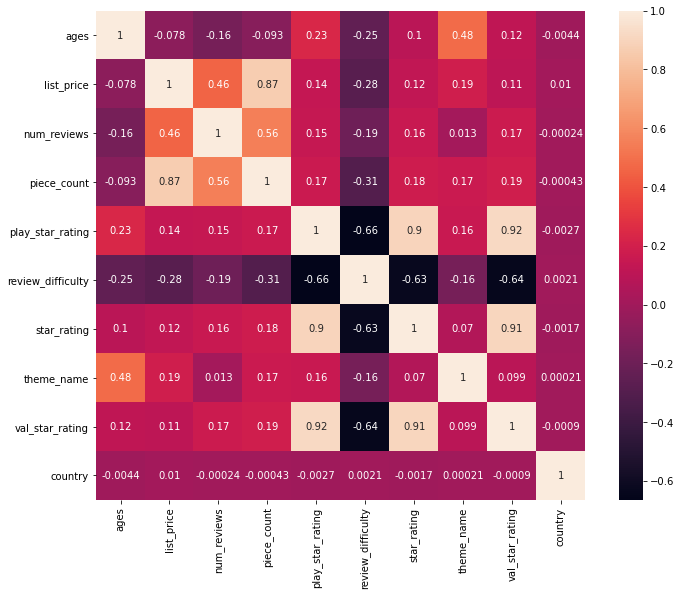

In [5]:
# Create a pairwise correlation.
corrmat = df.corr()
corrmat
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, square=True, annot=True)

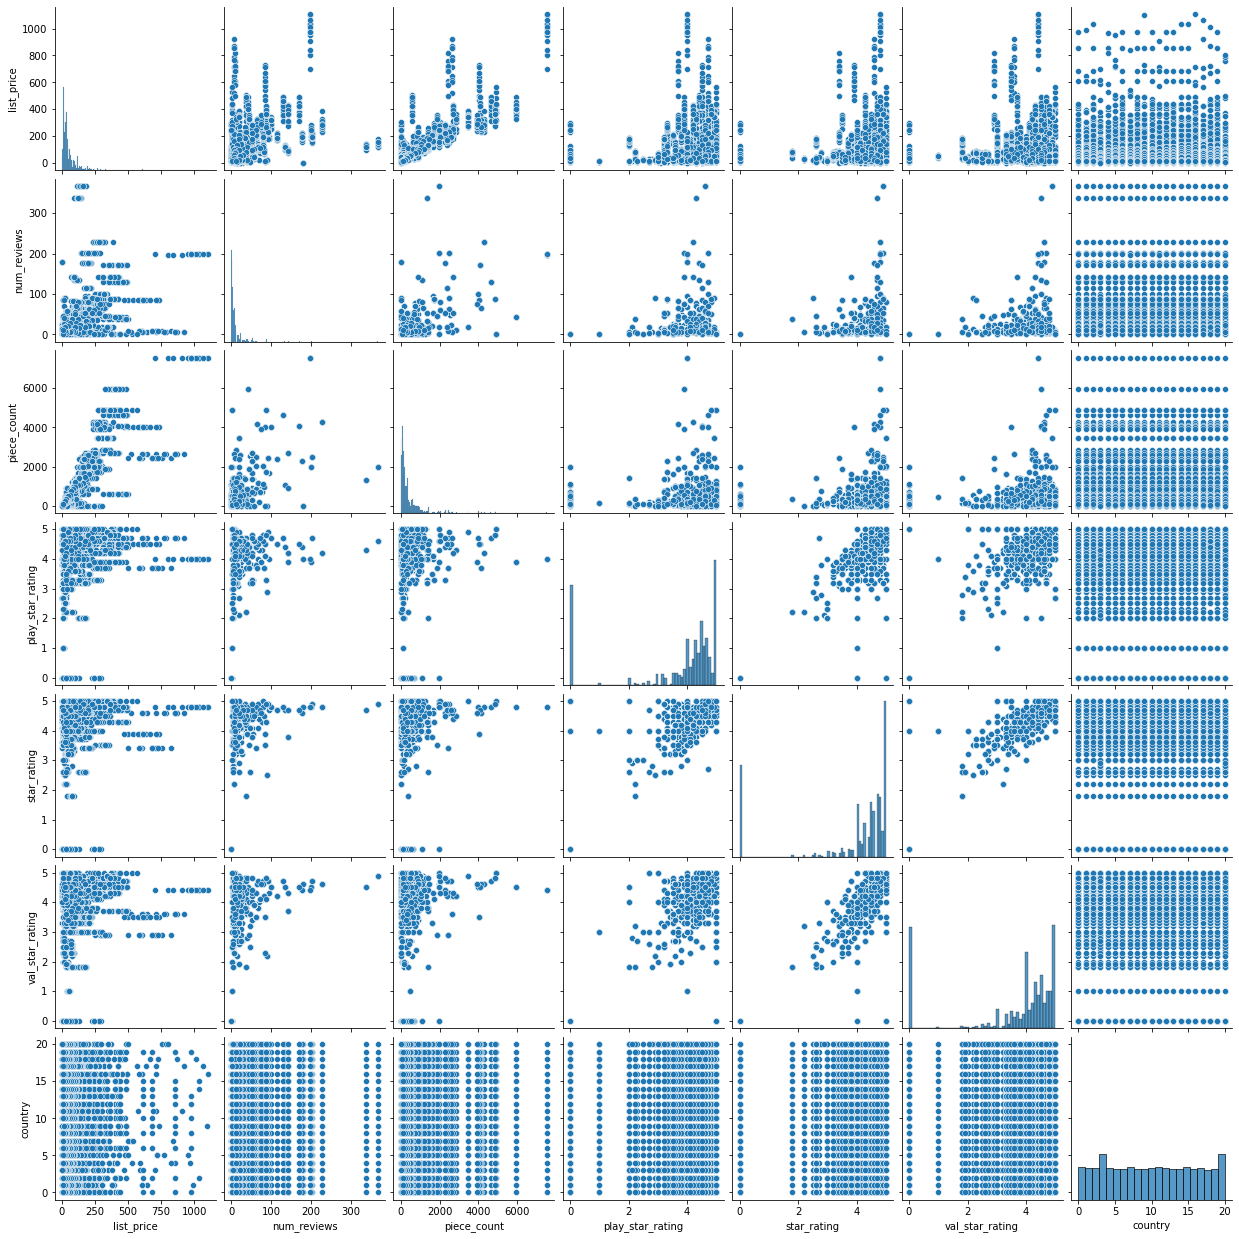

In [6]:
# Perfrom a pairplot of the numerical data.
sns.pairplot(df[num_col])

For price, only piece count shows a strong correlation value. The three rating categories all share high correlations with other. This means if any of these categories are to be used, only one can be used. The ratings variables themselves however are all non-correlative with price. Because of this, focus will stay on piece count and price for the linear regression model.


## Clean and transform data
Now to check our dependent and independent variables more closely.

In [7]:
def box_dist_plot(col):
    """
    This function will produce a boxplot of a specified column of a dataframe
    col = column to be plotted
    """
    f, (ax_box, ax_dist) = plt.subplots(2, figsize=(10,6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x=col, data=df, ax=ax_box)
    sns.histplot(df[col], kde=False, ax=ax_dist)
    ax_dist.set_ylabel("Counts")
    ax_box.set_xlabel(col)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    print(col, ": Lower Whisker:",lower_whisker, "Upper Whisker:",upper_whisker)

In [8]:
def OutlierRemover(col):
    """
    Removes any outliers in a specified column as defined by box plots.
    col = column to have outliers removed.
    """
    global df
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    df = df[(df[col]>lower_whisker)&(df[col]<upper_whisker)]

piece_count : Lower Whisker: -573.5 Upper Whisker: 1214.5
list_price : Lower Whisker: -55.31330000000001 Upper Whisker: 145.4955


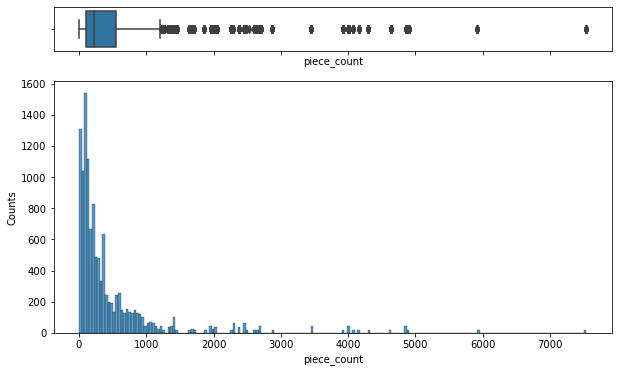

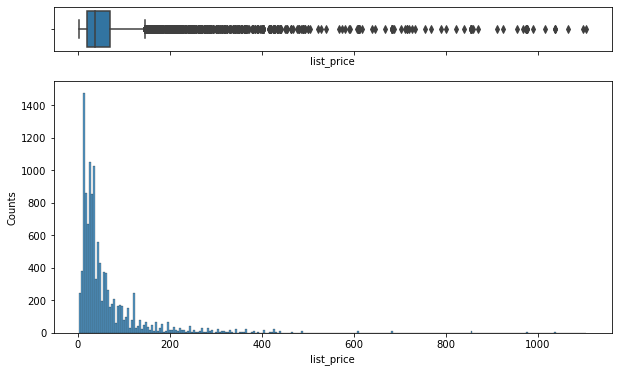

In [9]:
# Plot the variables
box_dist_plot("piece_count")
box_dist_plot("list_price")

While it may look like the data contains many outliers, the more likely answer is the data needs normalisation before continuing.

Apply a log transformation.

In [10]:
# Log transformation to normalise data.
df["piece_count_log"] = np.log(df["piece_count"])
df["list_price_log"] = np.log(df["list_price"])

piece_count_log : Lower Whisker: 1.9883535759745437 Upper Whisker: 8.88530664938478
list_price_log : Lower Whisker: 1.1112245806597358 Upper Whisker: 6.13524476159993


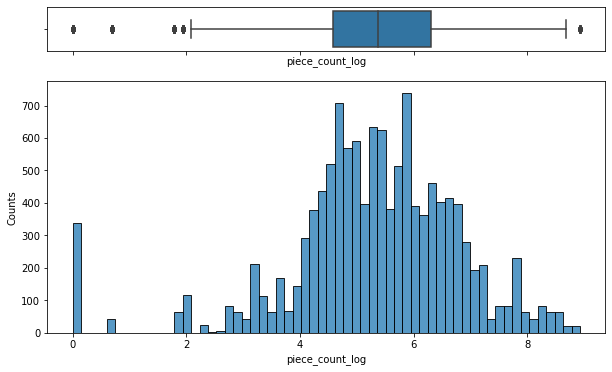

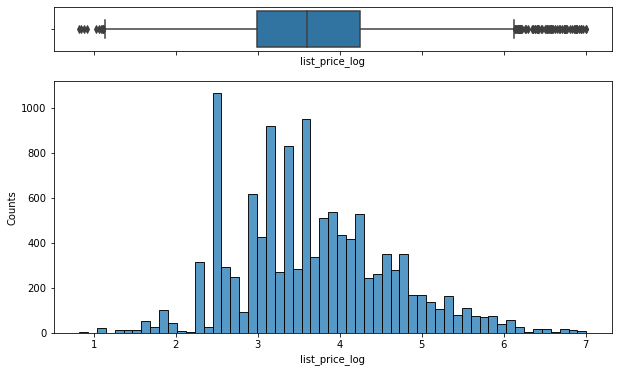

In [11]:
# Check our transformed data.
box_dist_plot("piece_count_log")
box_dist_plot("list_price_log")

The log transformation assists in normalising the data, but many outliers still exist. 

Check the normalisation status using a chi squared test.

In [12]:
# Perform the Chi Squared test.
stat, p = chisquare(df["piece_count_log"])
print("Stat =%.3f, p=%.3f\n" % (stat,p))

stat, p = chisquare(df["piece_count"])
print("Stat =%.3f, p=%.3f\n" % (stat,p))

stat, p = chisquare(df["list_price_log"])
print("Stat =%.3f, p=%.3f\n" % (stat,p))

stat, p = chisquare(df["list_price"])
print("Stat =%.3f, p=%.3f\n" % (stat,p))

Stat =5609.082, p=1.000

Stat =16926913.253, p=0.000

Stat =2984.855, p=1.000

Stat =1592282.995, p=0.000



p changes from less than 0.05 to greater than 0.05 after the log transformation which implies the data has now become normalised.

Proceed with outlier removal.

In [13]:
OutlierRemover("piece_count_log")
OutlierRemover("list_price_log")

piece_count_log : Lower Whisker: 2.1864770051098943 Upper Whisker: 8.766432591903571
list_price_log : Lower Whisker: 1.3048774961042624 Upper Whisker: 6.019053012333215


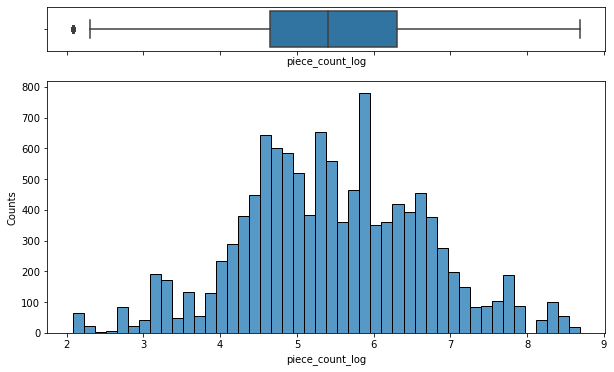

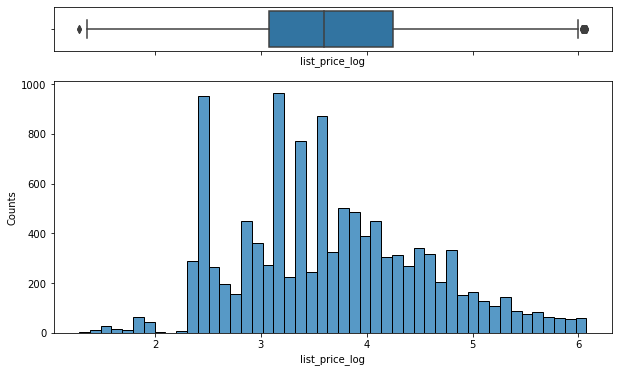

In [14]:
# Check if the remover worked.
box_dist_plot("piece_count_log")
box_dist_plot("list_price_log")

The data is now normalised and outliers have been trimmed.
## Modelling data
Now a helper function will establish the full modelling process. 

It starts by shaping the input for use.

Then it will split the data into training and testing segments. Sklearn's train_test_split will perform this at 0.2, meaning 20% of the dataset will be used to test the data and the remaining 80% will be used to train it. 

Then it will fit the data to the model using the training data, produce the coefficient and intercept values, then score against the test data.

Finally it will perform a homoscedasticity test by plotting the residuals.

In [15]:
def homoscedasticity_test(model, X_test, y_test):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals vs. fitted values.
    
    model - fitted model
    X_test - the test portion of the independant variable
    y_test - the test portion of the target variable
    '''
    # Predict values.
    fitted_vals = model.predict(X_test)
    # Calculate residuals.
    resids = (y_test - fitted_vals)
    # Plot.
    fig, ax = plt.subplots(1,1)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax, line_kws={'color': 'red'})
    ax.set_title('Residuals vs Fitted', fontsize=16)
    ax.set(xlabel='Fitted Values', ylabel='Residuals')

In [16]:
def model_data(X, y):
    """
    Performs the modelling process for a set independant variable and target variable.
    Contains train and test processes and uses the Linear Regression model.
    
    X = Independant column
    y = Target column
    """
    # Reshape the independant column to fit the modeller.
    X = X.values.reshape(-1,1)
    # Split the data into training and testing sets using 20% test size. Set random state.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
    # Create the model.
    linreg = LinearRegression()
    # Train the model against the training data.
    linreg.fit(X_train, y_train)
    # Output the alpha and beta values.
    print(linreg.coef_ , linreg.intercept_)
    # Map a prediction on the test values.
    prediction = linreg.predict(X_test)
    # Plot the data
    plt.figure(figsize=(12,6))
    plt.plot(X, y, "o")
    plt.plot(X_test, prediction, "r", linewidth=2)
    plt.xlabel("Piece Count")
    plt.ylabel("Listed Price")
    plt.title("Piece Count Vs Listed Price")
    plt.show()
    # Perform a homoscedasticity test
    homoscedasticity_test(linreg, X_test, y_test)

[0.60186404] 0.3851509445439323


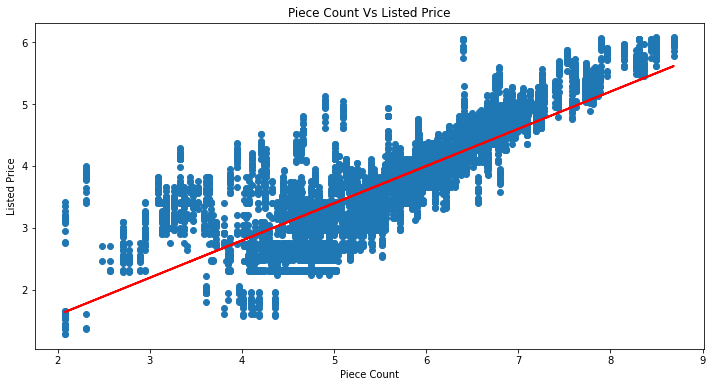

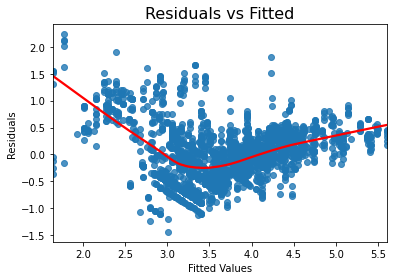

In [17]:
# Test using the log transformed data
model_data(df["piece_count_log"], df["list_price_log"])

The data does resemble something of a linear relationship. The residual plot suggest some degree of non-linearity between the variables.

To test a theoretical output, feed in a piece count, say 100, get the log transform of that value, then compute using the alpha and beta. We then take the exponent of the result to convert the output back to price in dollar amounts.

In [18]:
# Compute the predicted price of a 100 piece lego set.
test = np.log(100)*0.602 + 0.385
print(np.exp(test))

23.50733386828281


The log transformed model assumes a 100 piece lego set will cost around 23 dollars.

Next, to test against the original variables.

[0.08398582] 19.90020931575323


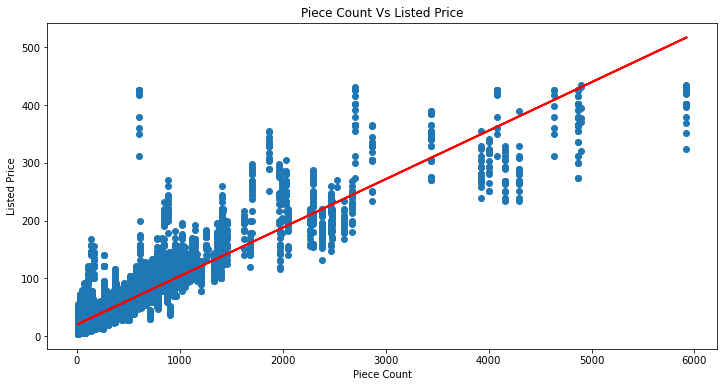

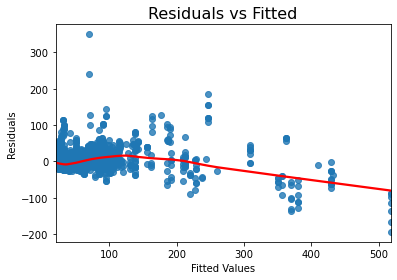

In [19]:
# Test using the original variables.
model_data(df["piece_count"], df["list_price"])

The graph has the expected linear relation seen prior and the model appears to have a smaller residual impact than the logarithmic model.

To test the same 100 lego piece set, there is no need for conversions. Simply use the alpha and beta values.

In [20]:
test = 100*0.0840 + 19.90
test

28.299999999999997

The difference between the two models is not significant enough to warrent desire of one over the other. Instead, it would be optimal to run both for the client and provide two likely values instead.